# Telecom Customer Churn Analysis

**Name:** Mian Ahsan Jan  
**Date:** 18/05/2025  
**GitHub:** [Ahhssenn](https://github.com/Ahhssenn)  
**Email:** Ahsenjan@gmail.com

---

### Project Overview

This project explores a **Telecom Customer Churn Dataset** to understand the factors that contribute to customer churn. The goal is to perform **Exploratory Data Analysis (EDA)** and apply basic **machine learning techniques** to predict whether a customer is likely to churn.

Through this project, we aim to:

- Identify patterns and trends in customer behavior.
- Understand which services and demographics are linked to higher churn rates.
- Build and evaluate a classification model to predict churn.

The project is structured step-by-step to demonstrate the data science workflow clearly and effectively.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5532,8174-LNWMW,Female,0,No,No,31,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.90,689.35,No
5430,6331-LWDTQ,Male,0,No,No,10,Yes,Yes,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),72.15,794.25,Yes
5210,2794-XIMMO,Male,0,Yes,No,53,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,60.45,3184.25,Yes
1687,8332-OSJDW,Male,0,Yes,Yes,12,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,26.40,314.95,No
5823,9867-NNXLC,Female,0,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,470.2,No


In [4]:
df.isnull().sum() / len(df) * 100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
print(df['TotalCharges'].dtype) # total charges is an object which means it has some non-numeric values which can be missing values or spaces


object


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # convert to numeric and set errors='coerce' to convert non-numeric values to NaN

In [11]:
df['TotalCharges'].isna().sum() # Check for missing values again.


np.int64(11)

In [12]:
df = df.dropna(subset=['TotalCharges'])

# Applying EDA to the data

array([[<Axes: title={'center': 'MonthlyCharges'}>]], dtype=object)

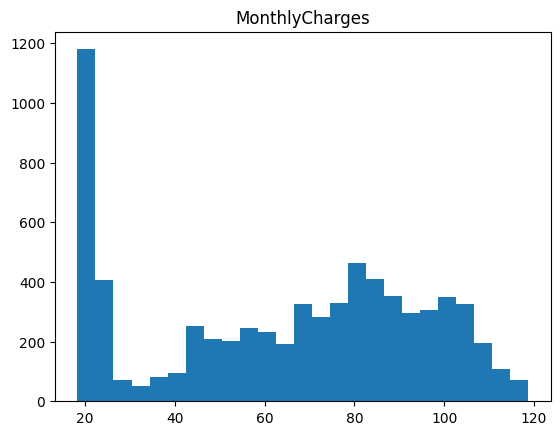

In [13]:
df.hist(column= 'MonthlyCharges', bins=25, grid=False)

- The histogram on monthly charges shows a right skewed distribution.
- Most customers pay around 20$ to 30$ and has a large spike in this range
- There is steady spread accross higher charges, and fewer people pay above 100$
- This may indicate that many people are on basic or promotional packages , and there is small number of people that uses premium services

Text(0.5, 1.0, 'Gender vs Churn')

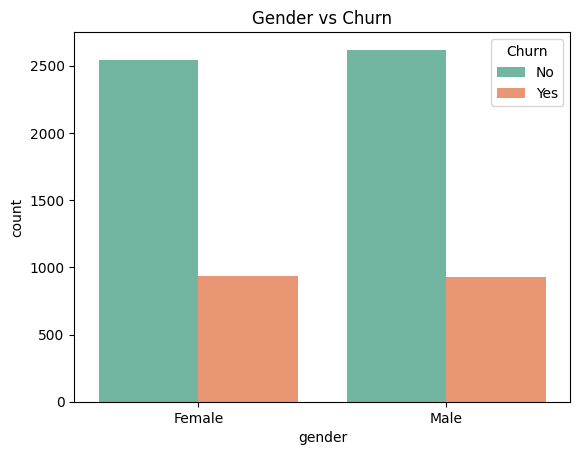

In [14]:
sns.countplot(x='gender', data=df, hue='Churn', palette='Set2')
plt.title('Gender vs Churn')

- There is no noticable difference in the number of people chunred based on gender.
- The number of men and women chunred is almost the same.
- Also those who stayed is also the same.However the male number is slightly higher than female number.

Text(0.5, 1.0, 'Internet Service vs Churn')

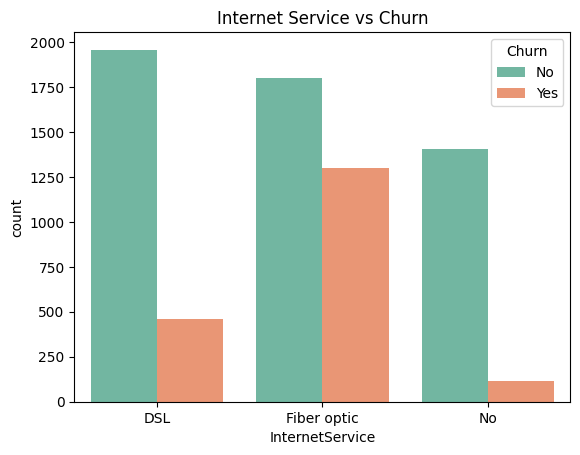

In [15]:
sns.countplot(x='InternetService', data=df, hue='Churn', palette='Set2')
plt.title('Internet Service vs Churn')

- The countplot reveals that customers using DSL are less likely to churn, while those with Fiber optic service show a significantly higher churn rate.
- Customers with no internet service (likely using only phone plans) have the lowest churn, suggesting that simpler or lower-cost plans may lead to greater 


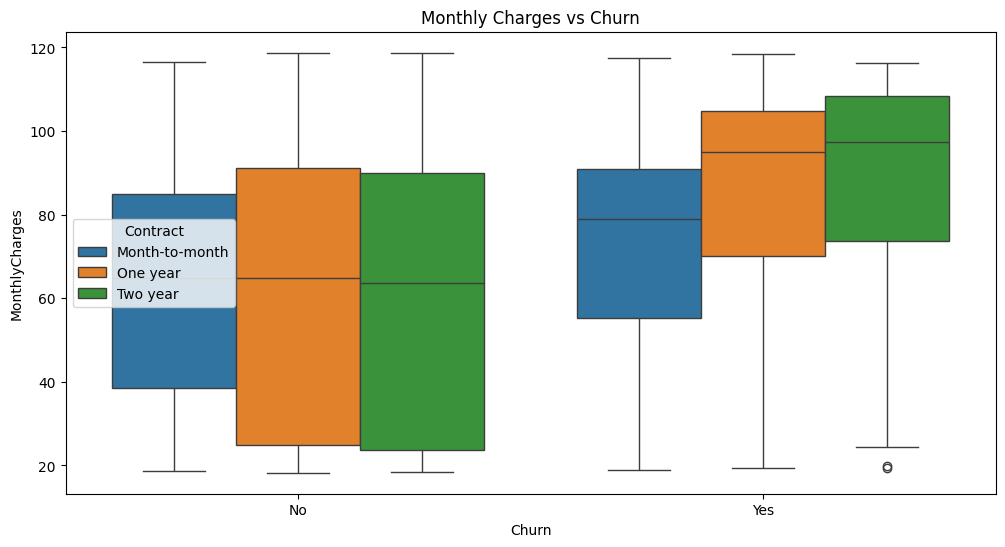

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))  # Create figure & axis first
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Contract', data=df, ax=ax)  # plot on ax
ax.set_title('Monthly Charges vs Churn')  # set title on that ax
plt.show()



- Month-to-month customers churn more than those on long-term contracts.
- Higher monthly charges are associated with higher churn, particularly in customers on fixed contracts, suggesting that both pricing and contract flexibility are key churn drivers

Text(0.5, 1.0, 'Tenure Distribution')

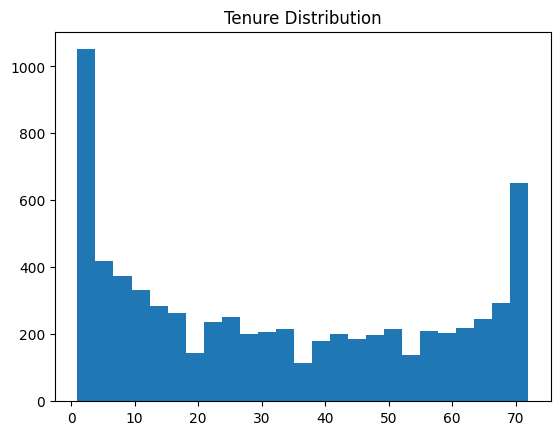

In [17]:
df['tenure'].hist(bins=25, grid=False)
plt.title('Tenure Distribution')

- The histogram of the tenure feature reveals that a large number of customers have very short tenures, particularly in the first 1–2 months, indicating early churn or quick cancellations.

- After the initial spike, the distribution remains relatively flat across mid-range tenures, suggesting a steady retention pattern for a portion of the customer base.

- A secondary spike appears around the 60-month mark, which may reflect a group of loyal, long-term customers who have stayed for 5 years or more.
Overall, the distribution is moderately right-skewed, with a higher concentration of customers having shorter tenures than longer ones.

<Axes: xlabel='Churn', ylabel='tenure'>

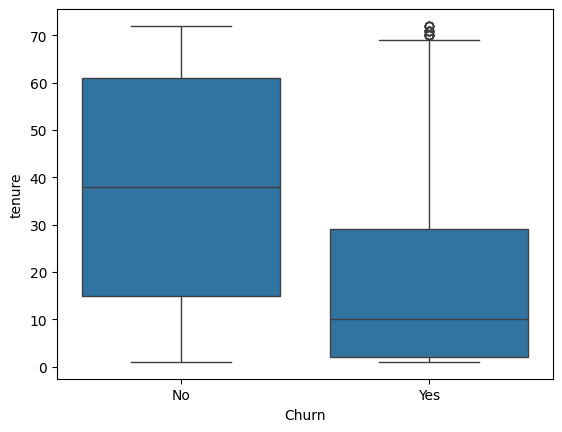

In [18]:
sns.boxplot(x='Churn', y='tenure', data=df)

- The boxplot shows that churned customers generally have shorter tenures, with most falling between 0 to 20 months. This suggests many customers leave early in their subscription.

- In contrast, non-churned customers tend to have longer tenures, with most staying between 20 to 60 months.

- The presence of outliers among churned customers indicates that while churn is more common among newer users, a few long-term customers also decide to leave.

- Overall, the plot highlights a clear relationship between low tenure and higher churn risk.

<Axes: >

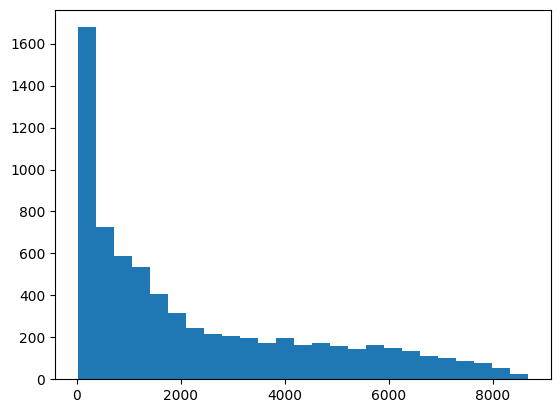

In [19]:
df['TotalCharges'].hist(bins=25, grid=False)

- The histogram of TotalCharges is heavily right-skewed, with a sharp spike near 0, indicating a large number of customers with very low total charges — likely those with short tenures.
- Beyond the initial spike, the distribution gradually declines, and after around $2000, it appears more uniformly spread with fewer customers having very high total charges.
- This pattern suggests that many customers leave early, before accumulating high charges, while long-term customers are fewer but contribute more revenue.
By itself, this distribution does not strongly indicate a clear relationship with churn — that will require comparing TotalCharges across churn categories.n

<Axes: xlabel='Churn', ylabel='TotalCharges'>

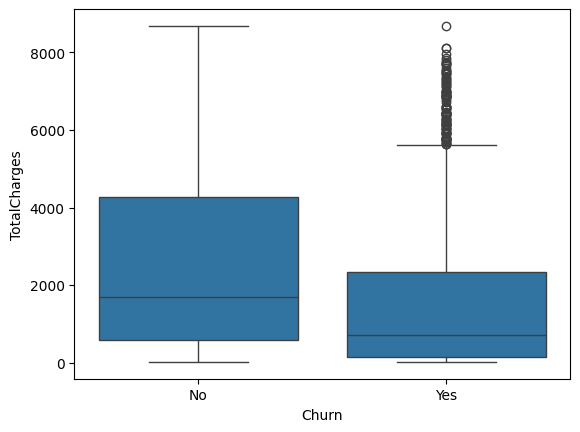

In [20]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

- The boxplot reveals that customers who churned generally had lower total charges, mostly concentrated below $2000. This suggests they likely left the service early.

- In contrast, customers who did not churn show a wider range of total charges, with many paying up to $8000+, indicating longer tenure and continued service use.

- There are several outliers among churned customers, but they are relatively few.
Overall, this supports the idea that low total charges are associated with higher churn, possibly due to dissatisfaction early in the service lifecycle.

In [21]:
df.drop(columns=['customerID'], inplace=True) # drop customerID as it is not useful for analysis

In [22]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6896,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,43.95,43.95,Yes
315,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40,No
4433,Female,0,No,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.65,302.35,No
3181,Female,0,Yes,No,64,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,81.30,5129.30,No
1274,Female,0,Yes,Yes,62,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),101.15,6638.35,No
5186,Female,1,No,No,1,No,No phone service,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,36.45,36.45,Yes
3250,Male,0,Yes,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.55,184.95,No
747,Female,1,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.90,No
886,Female,1,No,No,7,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,84.35,609.65,No
6657,Female,0,Yes,No,49,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.45,900.90,No


<Axes: xlabel='PhoneService', ylabel='count'>

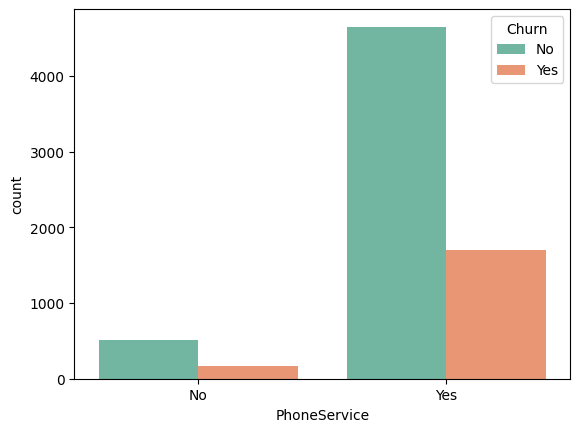

In [23]:
sns.countplot(x='PhoneService', data=df, hue='Churn', palette='Set2')

- Customers without phone service are a small group, and most of them did not churn. Among those with phone service, a larger portion stayed, but churn was also substantial simply because this group is much larger.

<Axes: xlabel='MultipleLines', ylabel='count'>

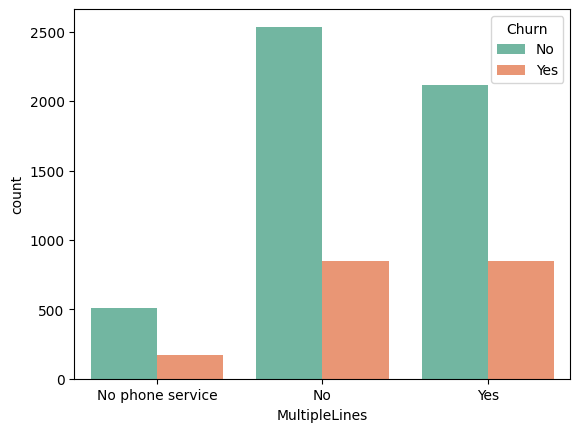

In [24]:
sns.countplot(x='MultipleLines', data=df, hue='Churn', palette='Set2')

- Customers without multiple lines form the largest group overall. While some of them did churn, the majority stayed with the service.
- Customers with multiple lines also have a large presence, and a notable portion of them churned, but the number who stayed is still higher.
- The group with no phone service is relatively small (around 500 users), and very few of them churned, making it less impactful in the churn pattern.

<Axes: xlabel='OnlineSecurity', ylabel='count'>

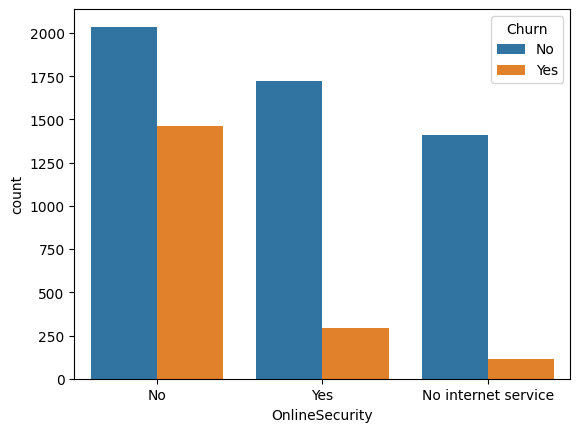

In [25]:
sns.countplot(x='OnlineSecurity', data=df, hue='Churn')

- Customers without Online Security had a higher churn rate compared to those with the service. While a larger number of these customers remained, the churn among them is still significant.
- In contrast, customers with Online Security show substantially lower churn, suggesting that this service may play an important role in customer retention.
- For customers with No Internet Service, churn is very low, but this is likely because these users aren’t using internet-based services and may represent a different segment of the customer base.

<Axes: xlabel='StreamingTV', ylabel='count'>

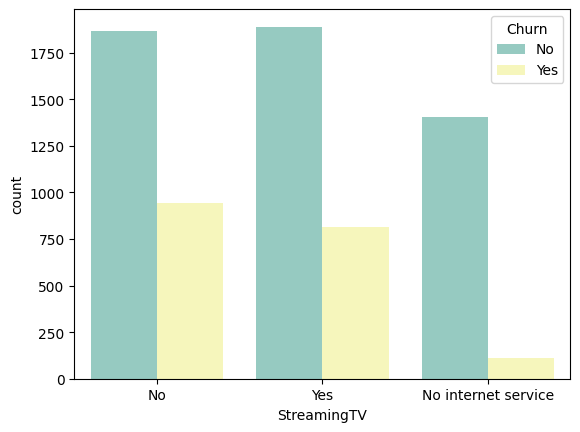

In [26]:
sns.countplot(x='StreamingTV', data=df, hue='Churn', palette='Set3')

- Customers who subscribed to StreamingTV show a higher total count, and while many of them stayed, a notable portion churned — indicating that having this service does not necessarily guarantee retention.
- Interestingly, customers who did not have StreamingTV had a similar number of total users, but their churn rate appears slightly higher than those who did — although the difference isn't drastic.
- Customers with No Internet Service have the lowest churn, but this segment is less relevant to churn analysis for streaming services, as they are not using internet-based features at all.

In [27]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}) # convert Churn to binary for correlation analysis

Text(0.5, 1.0, 'Correlation heatmap of Churned Customers')

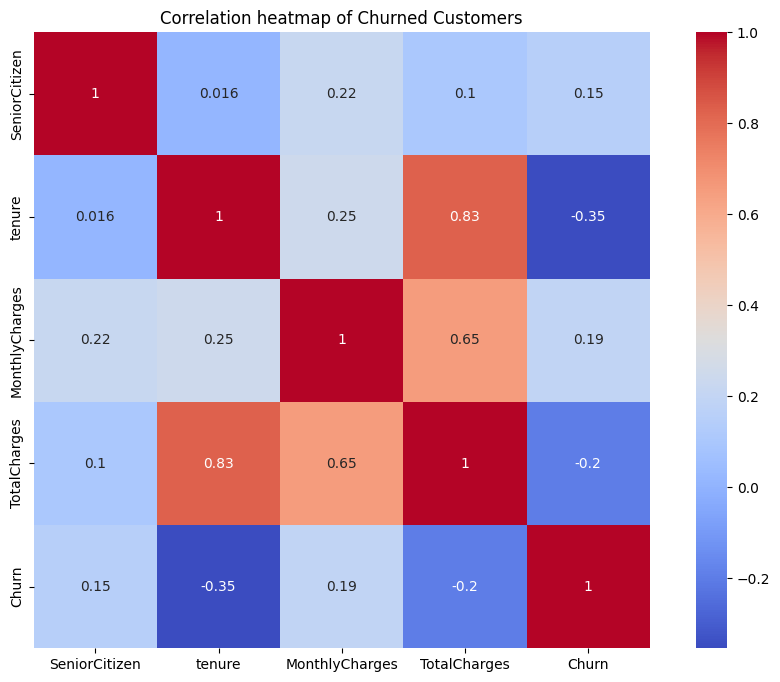

In [28]:
corr = df.select_dtypes(include='number').corr() # select only numeric columns for correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation heatmap of Churned Customers")

- Tenure vs. TotalCharges (0.83):
There is a strong positive correlation between tenure and total charges. This indicates that the longer a customer stays, the more they tend to spend.

- MonthlyCharges vs. TotalCharges (0.65):
A moderate positive correlation suggests that customers with higher monthly charges accumulate greater total charges over time.

- Tenure vs. Churn (~ -0.35):
A moderate negative correlation shows that customers with longer tenure are less likely to churn.

- TotalCharges vs. Churn (~ -0.2):
A weak negative correlation suggests that customers who have paid less in total are slightly more likely to churn — likely due to shorter subscription durations.

- MonthlyCharges vs. Churn (~ 0.2):
A weak positive correlation indicates that customers with higher monthly charges may be slightly more likely to churn.

- SeniorCitizen vs. Churn (~ 0.15):
A small positive correlation suggests that senior citizens are slightly more likely to churn than non-senior customers.

- SeniorCitizen vs. TotalCharges (~ 0.2):
A weak positive correlation, showing that senior citizens tend to have slightly higher total charges, possibly due to specific service plans.

# Encoding categorical columns for machine learning models 

In [29]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [31]:
# label encoding for two categorical variables 
df['Dependents_encoded'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService_encoded'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling_encoded'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Partner_encoded'] = df['Partner'].map({'Yes': 1, 'No': 0})

In [32]:
df['Gender_encoded'] = df['gender'].map({'Female': 1, 'Male': 0})

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Partner_encoded,Gender_encoded
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,0,0,1,1,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,0,1,0,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,1,0,1,1,0,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,0,0,0,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,1,0,1,1,0,1


In [34]:
# one-hot encoding for more than two categorical variables
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
], drop_first=True)


# Model Training

In [35]:
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target variable (0 = no churn, 1 = churn)

In [36]:
X = X.drop(columns=['Dependents','PhoneService','PaperlessBilling','Partner']) # Drop original categorical columns

In [37]:
X = X.drop(columns=['gender'])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [40]:
y.value_counts(normalize=True)


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [ ]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN']

# to get the best parameters for each model using GridSearchCV
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10],'solver': ['liblinear']},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 5, 10], 'min_samples_split': [2,3,4]},
    'Random Forest': {'n_estimators': [10, 50], 'max_depth': [None, 5, 10]},
    'KNN': {'n_neighbors': [3, 5, 7],'weights': ['uniform','distance'],'p': [1, 2] } # Manhattan (1) and Euclidean (2)
}
best_models = []
for model, model_name in zip(models, model_names):
    grid = GridSearchCV(model, param_grid[model_name], cv=5)
    grid.fit(x_train, y_train)
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    best_models.append((model_name, grid.best_estimator_))

models_scores = []
for model_name, model in best_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n🔹 {model_name}")
    print(f"  Accuracy:  {acc:.2f}")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall:    {rec:.2f}")
    print(f"  F1 Score:  {f1:.2f}")
    models_scores.append([model_name, acc])

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')

sorted_models = sorted(models_scores, key=lambda x: x[1], reverse=True)
for model in sorted_models:
    print("Accuracy Score: ",f'{model[0]} : {model[1]:.2f}')

print(f"Best parameters for {model_name}: {grid.best_params_}")

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


In [ ]:
# saving the model
with open('model_results2.txt', 'w') as f:
    for model_name, model in best_models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        f.write(f"Model: {model_name}\n")
        f.write(f"  Accuracy:  {acc:.2f}\n")
        f.write(f"  Precision: {prec:.2f}\n")
        f.write(f"  Recall:    {rec:.2f}\n")
        f.write(f"  F1 Score:  {f1:.2f}\n")
        f.write("="*30 + "\n")

print("Results saved to model_results.txt")


Results saved to model_results.txt
